In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/netflix-datasets/Best Movie by Year Netflix.csv')

# Preview data
df.head()


,index,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION
0,0,White Christmas,1954,7.5,romance,US
1,1,The Guns of Navarone,1961,7.5,war,US
2,2,My Fair Lady,1964,7.8,drama,US
3,3,Bonnie and Clyde,1967,7.7,drama,US
4,4,Dirty Harry,1971,7.7,thriller,US


In [4]:
# Dataset overview
df.info()

# Summary statistics for numeric columns
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            49 non-null     int64  
 1   TITLE            49 non-null     object 
 2   RELEASE_YEAR     49 non-null     int64  
 3   SCORE            49 non-null     float64
 4   MAIN_GENRE       49 non-null     object 
 5   MAIN_PRODUCTION  49 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.4+ KB


index              0
TITLE              0
RELEASE_YEAR       0
SCORE              0
MAIN_GENRE         0
MAIN_PRODUCTION    0
dtype: int64

What are the most common genres?

Which years had the highest scoring movies?

Is there a trend in SCORE over RELEASE_YEAR?

Which production companies appear most often?

Are there any missing or unusual data?

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Movie Scores')

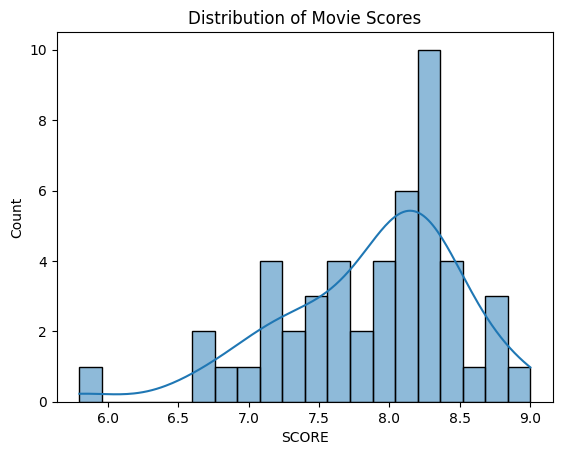

In [7]:
# 1. Distribution of Scores
sns.histplot(df['SCORE'].dropna(), kde=True, bins=20)
plt.title('Distribution of Movie Scores')


Text(0.5, 1.0, 'Count of Movies by Genre')

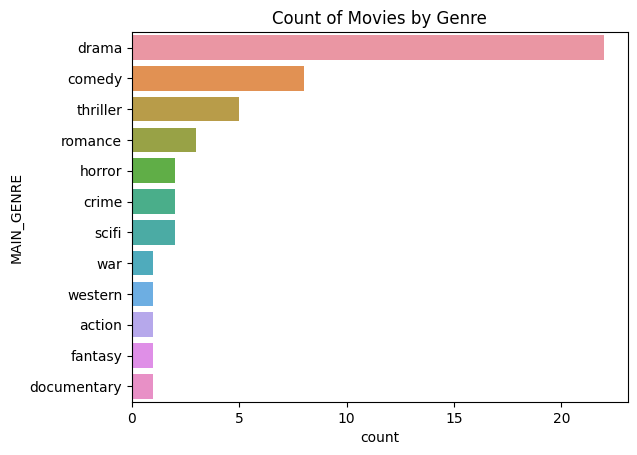

In [8]:
# 2. Movies per Genre
sns.countplot(y='MAIN_GENRE', data=df, order=df['MAIN_GENRE'].value_counts().index)
plt.title('Count of Movies by Genre')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, '1954'),
  Text(1, 0, '1961'),
  Text(2, 0, '1964'),
  Text(3, 0, '1967'),
  Text(4, 0, '1971'),
  Text(5, 0, '1973'),
  Text(6, 0, '1975'),
  Text(7, 0, '1976'),
  Text(8, 0, '1979'),
  Text(9, 0, '1980'),
  Text(10, 0, '1982'),
  Text(11, 0, '1983'),
  Text(12, 0, '1984'),
  Text(13, 0, '1986'),
  Text(14, 0, '1987'),
  Text(15, 0, '1989'),
  Text(16, 0, '1990'),
  Text(17, 0, '1991'),
  Text(18, 0, '1992'),
  Text(19, 0, '1993'),
  Text(20, 0, '1994'),
  Text(21, 0, '1995'),
  Text(22, 0, '1996'),
  Text(23, 0, '1997'),
  Text(24, 0, '1998'),
  Text(25, 0, '1999'),
  Text(26, 0, '2000'),
  Text(27, 0, '2001'),
  Text(28, 0, '2002'),
  Text(29, 0, '2003'),
  Text(30, 0, '2004'),
  Text(31, 0, '2005'),
  Text(32, 0, '2006'),
  Text(33, 0, '2007'),
  Text

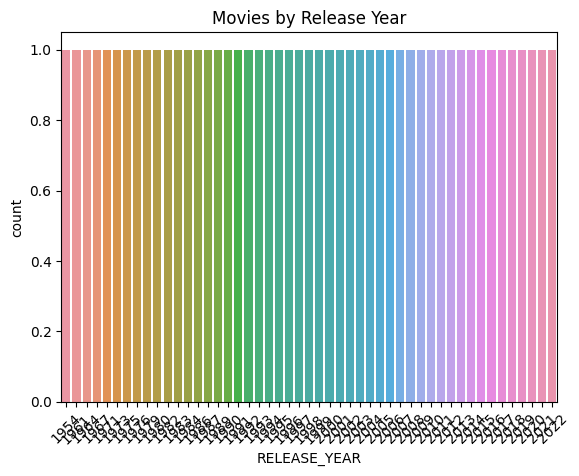

In [11]:
#3. Movies by Year
sns.countplot(x='RELEASE_YEAR', data=df, order=sorted(df['RELEASE_YEAR'].dropna().unique()))
plt.title('Movies by Release Year')
plt.xticks(rotation=45)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020., 2030.]),
 [Text(1950.0, 0, '1950'),
  Text(1960.0, 0, '1960'),
  Text(1970.0, 0, '1970'),
  Text(1980.0, 0, '1980'),
  Text(1990.0, 0, '1990'),
  Text(2000.0, 0, '2000'),
  Text(2010.0, 0, '2010'),
  Text(2020.0, 0, '2020'),
  Text(2030.0, 0, '2030')])

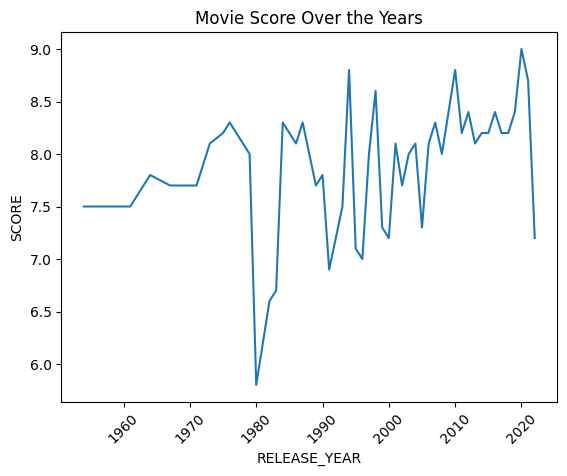

In [12]:
# Step 5: Bivariate Analysis (Relationships)
# 1. SCORE vs RELEASE_YEAR (Trend over time)
sns.lineplot(x='RELEASE_YEAR', y='SCORE', data=df)
plt.title('Movie Score Over the Years')
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Average Score by Genre')

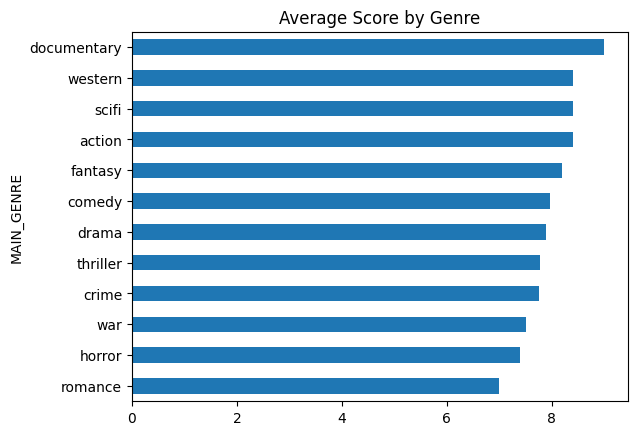

In [16]:
# 2. Average Score by Genre
df.groupby('MAIN_GENRE')['SCORE'].mean().sort_values().plot(kind='barh')
plt.title('Average Score by Genre')



Text(0.5, 1.0, 'Top 10 Production Companies')

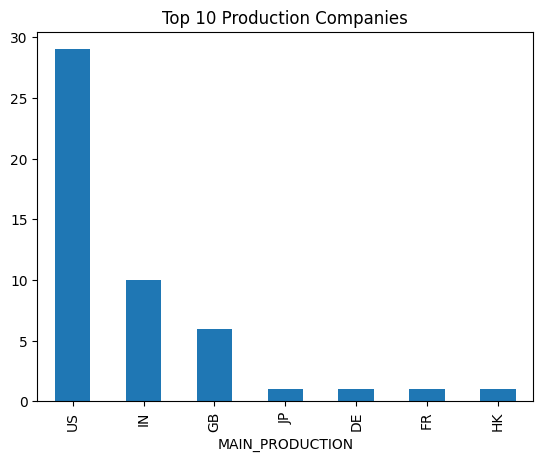

In [17]:
# 3. Top Production Companies by Frequency
df['MAIN_PRODUCTION'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Production Companies')


In [18]:
# Step 6: Check for Anomalies, Outliers & Data Issues
# 1. Missing Values
df.isnull().sum()


index              0
TITLE              0
RELEASE_YEAR       0
SCORE              0
MAIN_GENRE         0
MAIN_PRODUCTION    0
dtype: int64

In [19]:
# 2. Duplicates
df.duplicated().sum()


0

Text(0.5, 1.0, 'Boxplot of Movie Scores')

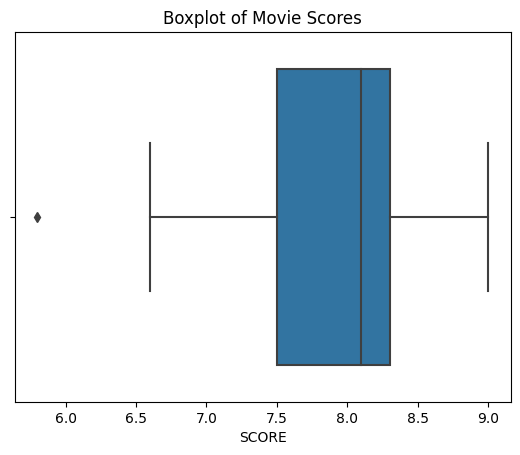

In [20]:
#3. Outliers in SCORE
sns.boxplot(x='SCORE', data=df)
plt.title('Boxplot of Movie Scores')


In [22]:
# Step 7: (Optional) Hypothesis Testing
from scipy.stats import ttest_ind

# Example: Drama vs Action
drama = df[df['MAIN_GENRE'] == 'Drama']['SCORE']
action = df[df['MAIN_GENRE'] == 'Action']['SCORE']

ttest_ind(drama.dropna(), action.dropna())


TtestResult(statistic=nan, pvalue=nan, df=nan)

Which genre is most popular?

Are scores increasing over the years?

Any missing or suspicious data?

Any recommendations for cleaning or modeling?


In [32]:
# Bonus: Data Cleaning Example

# Make a copy of the original DataFrame
df_clean = df.copy()

# 🔹 1. Drop rows where SCORE is missing
df_clean = df_clean.dropna(subset=['SCORE']).copy()

# 🔹 2. Fill missing values in MAIN_PRODUCTION safely
df_clean.loc[:, 'MAIN_PRODUCTION'] = df_clean['MAIN_PRODUCTION'].fillna('Unknown')

# 🔹 3. Convert RELEASE_YEAR to integer
df_clean.loc[:, 'RELEASE_YEAR'] = df_clean['RELEASE_YEAR'].astype(int)

# 🔹 4. Reset index
df_clean.reset_index(drop=True, inplace=True)

# ✅ Check cleaned data
df_clean.info()
df_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            49 non-null     int64  
 1   TITLE            49 non-null     object 
 2   RELEASE_YEAR     49 non-null     int64  
 3   SCORE            49 non-null     float64
 4   MAIN_GENRE       49 non-null     object 
 5   MAIN_PRODUCTION  49 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.4+ KB


,index,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION
0,0,White Christmas,1954,7.5,romance,US
1,1,The Guns of Navarone,1961,7.5,war,US
2,2,My Fair Lady,1964,7.8,drama,US
3,3,Bonnie and Clyde,1967,7.7,drama,US
4,4,Dirty Harry,1971,7.7,thriller,US
